# 第5回課題

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データの取得
kaggleからタイタニックのデータを使用する.<br>
https://www.kaggle.com/c/titanic/data

In [2]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# データの確認

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ul>
    <li>PassengerId: 乗客のID</li>
    <li>Survived: 生き残ったかどうか (0: No, 1: Yes)</li>
    <li>Pclass: クラス (1: 1st, 2: 2nd, 3: 3rd)</li>
    <li>Name: 名前</li>
    <li>Sex: 性別</li>
    <li>Age: 年齢</li>
    <li>SibSp: 一緒に乗船した兄弟, 配偶者の数</li>
    <li>Parch: 一緒に乗船した両親, 子供の数</li>
    <li>Ticket: チケットの番号</li>
    <li>Fare: 旅客料金</li>
    <li>Cabin: 客室番号</li>
    <li>Embarked: 乗船港 (C: Cherbourg, Q: Queenstown, S: Southampton)</li>
</ul>

# 仮説を立てる
<ul>
    <li>タイタニックのデータでは, タイタニック号沈没事故で乗船していた人の特徴量が入っている.</li>
    <li>今回は, そのデータを元に生き残ることができたかどうかを予測するモデルを作成する.</li> 
    <li>生き残ることができるかどうかで, 重要となってくる特徴は, 性別や年齢, Pclassが関係ありそう.</li>
    <li>性別は男性の方が力があるため, 助かる確率が高そう.</li>
    <li>年齢は高齢者よりは, 若い人の方が助かる確率が高そう.</li>
    <li>Pclassでは, 高いお金を払っている, ファーストクラスの人の方が助かる確率が高そう.</li>
</ul>

# 欠損値の処理
<p>
    欠損値が存在するのは, "Age", "Cabin", "Embarked"である.<br>
    "Age"の欠損値には, 平均値を入れる.<br>
    "Cabin"は3/4が欠損値であるため, 削除する.<br>
    "Embarked"はカテゴリ変数のため, 最頻値を入れる.
</p>

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop('Cabin', axis=1)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
df['Ticket'].value_counts()

347082        7
1601          7
CA. 2343      7
347088        6
3101295       6
             ..
349205        1
A/4. 39886    1
14313         1
347073        1
218629        1
Name: Ticket, Length: 681, dtype: int64

<p>"PassengerId", "Name", "Ticket"は削除する.</p>

In [6]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# データの分析

In [7]:
numerical = ['Age', 'Fare']
categorical = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

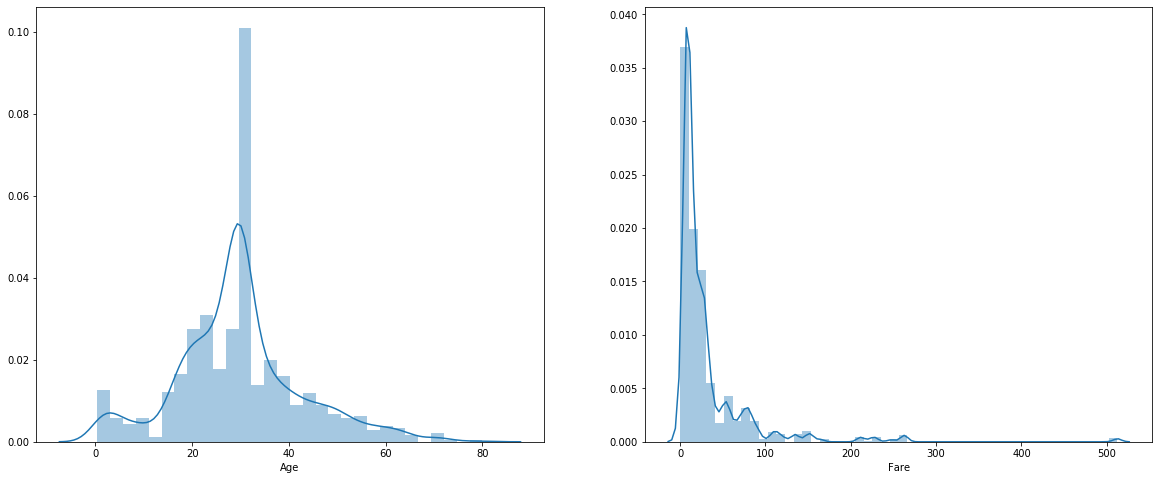

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for i, col in enumerate(numerical):
    sns.distplot(df[col], ax=axes[i])

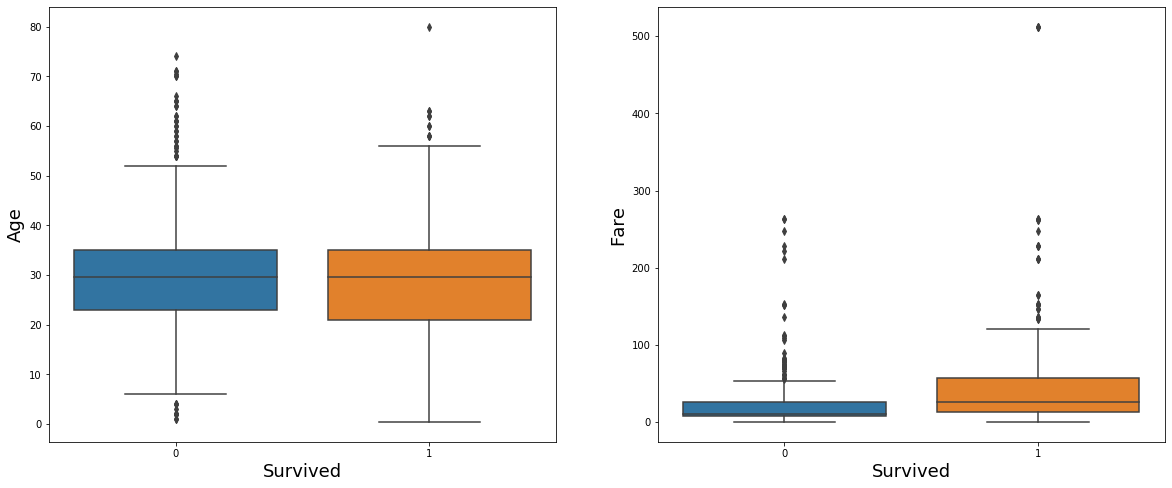

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for i, col in enumerate(numerical):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('Survived', fontsize=18)
    axes[i].set_ylabel(col, fontsize=18)

<p>外れ値が目立つため, 外れ値を削除する.</p>

In [10]:
def outlier_iqr(df, columns):
    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        iqr = q3 - q1
        
        outlier_min = q1 - 1.5 * iqr
        outlier_max = q3 + 1.5 * iqr
        
        df = df[(df[col] <= outlier_max) & (df[col] >= outlier_min)]
    
    return df

In [11]:
print(df.shape)
df = outlier_iqr(df, numerical)
print(df.shape)

(891, 8)
(718, 8)


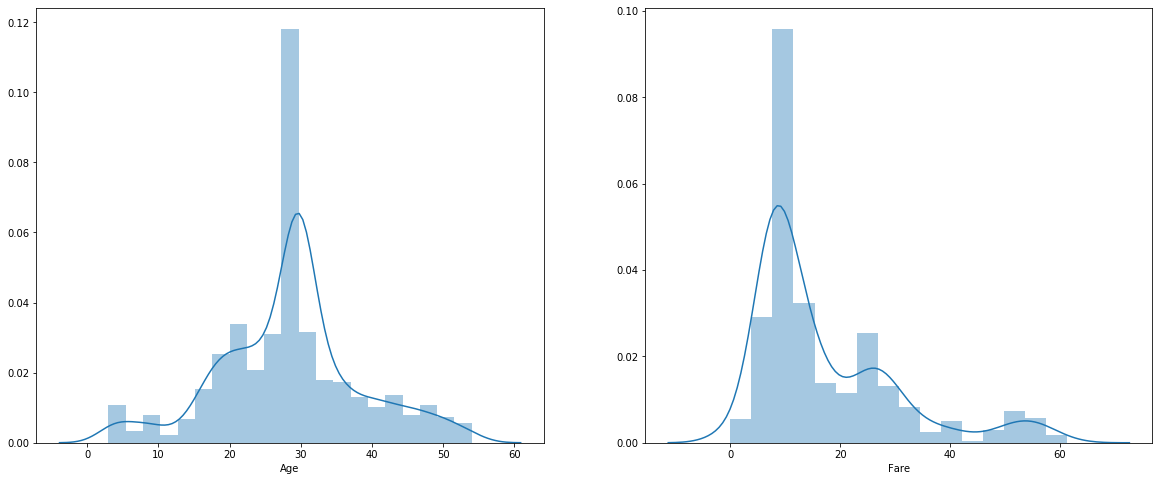

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for i, col in enumerate(numerical):
    sns.distplot(df[col], ax=axes[i])

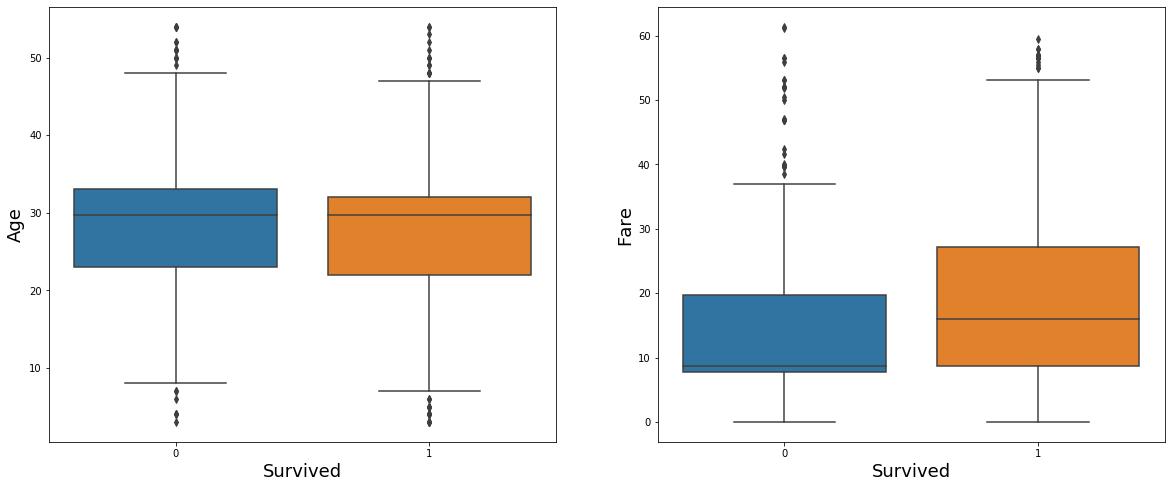

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for i, col in enumerate(numerical):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('Survived', fontsize=18)
    axes[i].set_ylabel(col, fontsize=18)

<ul>
    <li>年齢は30才ぐらいの人が多い</li>
    <li>生き残った人と亡くなった人との間に, 年齢の差あまりない</li>
    <li>料金を多く払った人の方が, 生き残っている</li>
</ul>

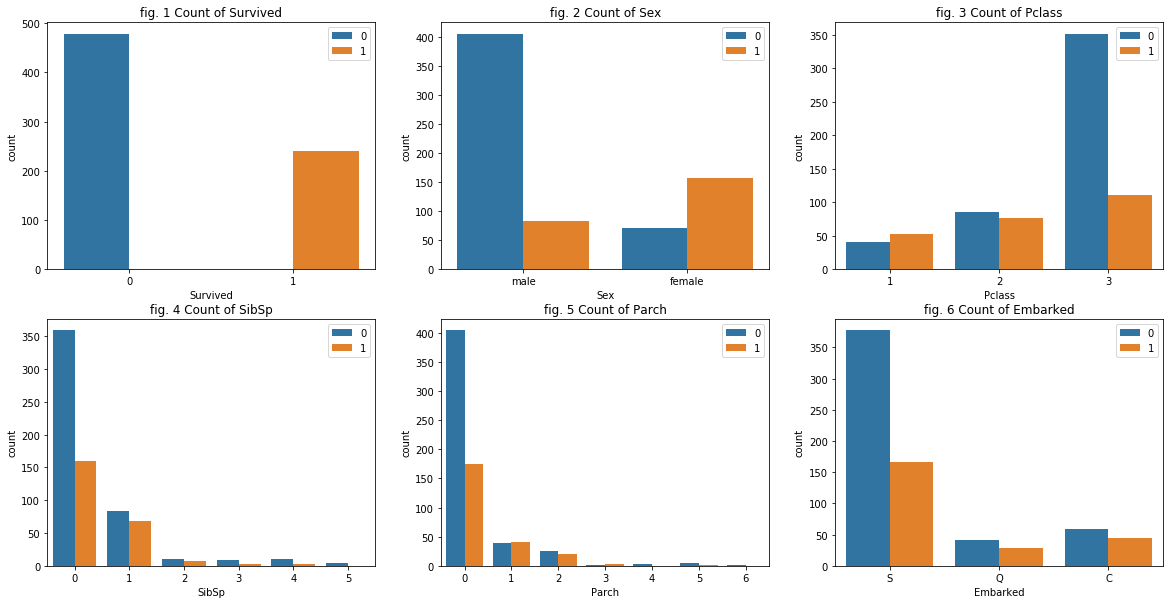

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(categorical):
    sns.countplot(x=col, hue='Survived', data=df, ax=axes[i // 3][i % 3])
    axes[i // 3][i % 3].legend(loc='upper right')
    axes[i // 3][i % 3].set_title('fig. ' + str(i + 1) + ' Count of ' + col, fontsize=12)

<ul>
    <li>fig.1から亡くなった人が生き残った人に約2倍いる</li>
    <li>fig.2から男性の方が亡くなっている人が多い</li>
    <li>fig.3から"Pclass"が3の人が亡くなっている人が多い</li>
    <li>fig.4, fig.5からTitanicの乗船者は一人で来ている人が多い</li>
    <li>fig.6から乗船港は"Southampton"が多い</li>
</ul>

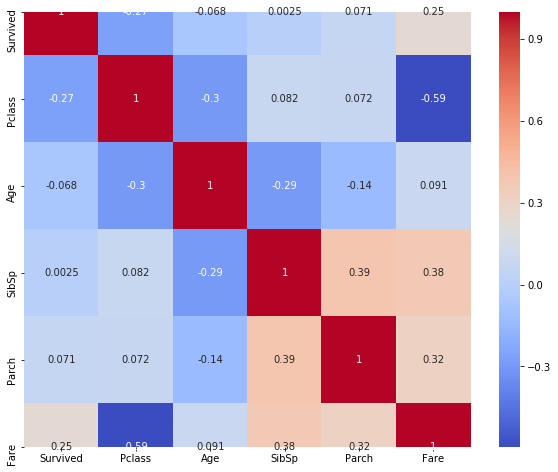

In [15]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<ul>
    <li>相関係数が大きい組み合わせは, "Pclass"と"Fare"</li>
    <li>"Pclass"はクラスであるため, 料金が高い人ほどクラスが高いのは当然である</li>
    <li>相関係数がやや高い組み合わせは, "Parch"と"SibSp"</li>
    <li>"Parch"は両親と子供の数, "SibSp"は兄弟と配偶者の数であるため, 関係性がある</li>
</ul>

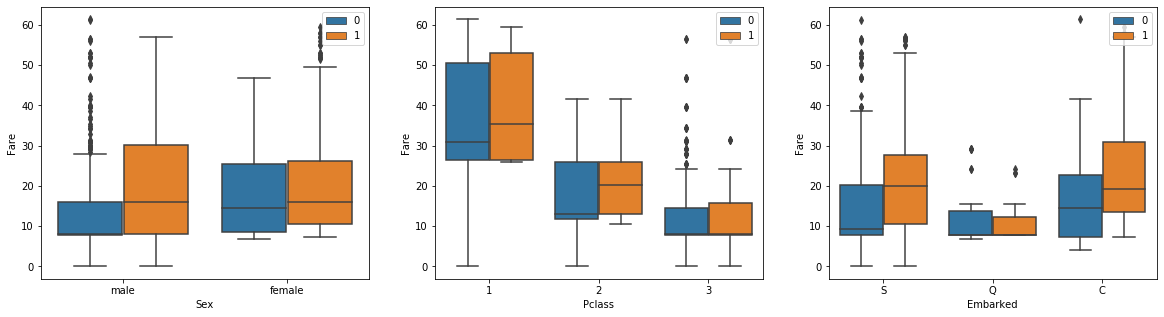

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(['Sex', 'Pclass', 'Embarked']):
    sns.boxplot(x=col, y='Fare', hue='Survived', data=df, ax=axes[i])
    axes[i].legend(loc='upper right')

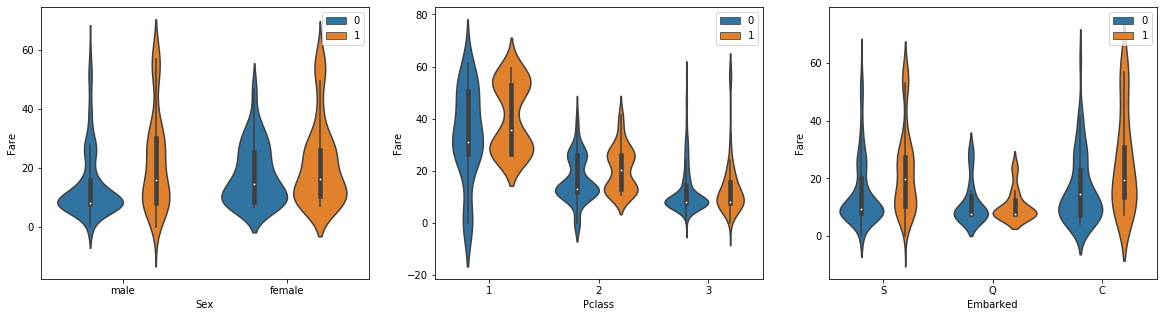

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(['Sex', 'Pclass', 'Embarked']):
    sns.violinplot(x=col, y='Fare', hue='Survived', data=df, ax=axes[i])
    axes[i].legend(loc='upper right')

<ul>
    <li>ファーストクラスは料金が高い</li>
    <li>男性より女性の方が若干料金を多く払っている</li>
    <li>乗船港が"Queenstown"の人は, 料金が安い</li>
</ul>

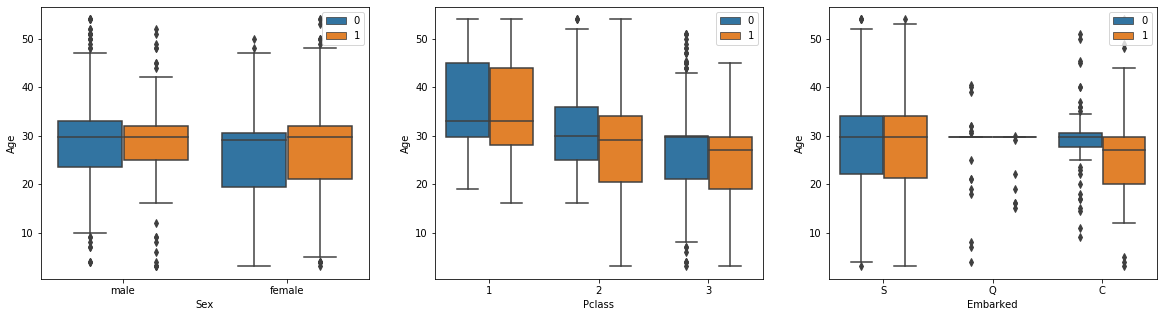

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(['Sex', 'Pclass', 'Embarked']):
    sns.boxplot(x=col, y='Age', hue='Survived', data=df, ax=axes[i])
    axes[i].legend(loc='upper right')

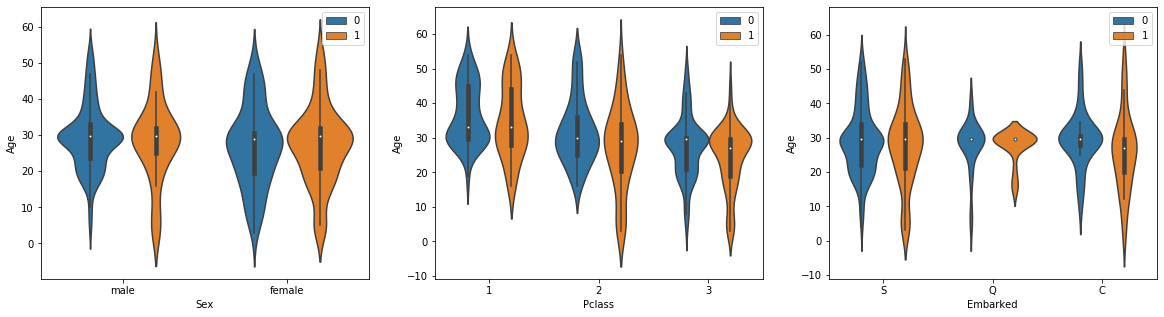

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(['Sex', 'Pclass', 'Embarked']):
    sns.violinplot(x=col, y='Age', hue='Survived', data=df, ax=axes[i])
    axes[i].legend(loc='upper right')

<ul>
    <li>性別と年齢には, 差がない</li>
    <li>ファーストクラスは, 年齢の高い人が多い</li>
    <li>全体的に30代の人が多い</li>
</ul>

Text(0, 0.5, 'Fare')

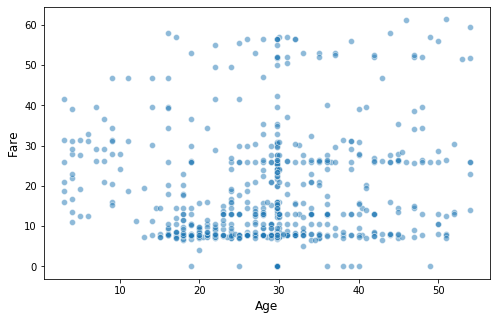

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)

<p>年齢と料金では, 相関関係が無さそう</p>

# スケーリング
<p>"Age"と"Fare"のスケーリングを行う</p>

In [21]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
for col in numerical:
    df[col] = standard_scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.644501,1,0,-0.751265,S
2,1,3,female,-0.245599,0,0,-0.700265,S
3,1,1,female,0.651930,1,0,2.712961,S
4,0,3,male,0.651930,0,0,-0.690821,S
5,0,3,male,0.123297,0,0,-0.659971,Q


# カテゴリをダミー変数に変換
"Pclass", "Sex", "Embarked"をダミー変数に変換する

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Pclass', 'Sex', 'Embarked']:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,-0.644501,1,0,-0.751265,2
2,1,2,0,-0.245599,0,0,-0.700265,2
3,1,0,0,0.651930,1,0,2.712961,2
4,0,2,1,0.651930,0,0,-0.690821,2
5,0,2,1,0.123297,0,0,-0.659971,1


In [23]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_1,Embarked_1,Embarked_2
0,0,-0.644501,1,0,-0.751265,0,1,1,0,1
2,1,-0.245599,0,0,-0.700265,0,1,0,0,1
3,1,0.651930,1,0,2.712961,0,0,0,0,1
4,0,0.651930,0,0,-0.690821,0,1,1,0,1
5,0,0.123297,0,0,-0.659971,0,1,1,1,0


# モデルの学習

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (538, 9)
X_test: (180, 9)
y_train: (538,)
y_test: (180,)


In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def predict_score(pred, y_test):
    accuracy = accuracy_score(pred, y_test)
    precision = precision_score(pred, y_test)
    recall = recall_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    return accuracy, precision, recall, f1

def print_predict_score(pred, y_test):
    accuracy, precision, recall, f1 = predict_score(pred, y_test)
    print('Accuracy Score:', accuracy)
    print('Precision score:', precision)
    print('Recall Score:', recall)
    print('f1 score:', f1)

# SVM

In [27]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print_predict_score(pred_svc, y_test)

Accuracy Score: 0.7722222222222223
Precision score: 0.6440677966101694
Recall Score: 0.6551724137931034
f1 score: 0.6495726495726496


In [28]:
from sklearn.model_selection import GridSearchCV

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': np.arange(1, 6, 1),
    'gamma': np.linspace(0.01, 1.0, 50),
    'random_state': [1]
}

grid_svc = GridSearchCV(SVC(), param_grid=svm_params, n_jobs=-1, cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': array([1, 2, 3, 4, 5]),...
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
                         'kernel': ['rbf', 'linear', 'poly'],
                         'random_state': [1]}

In [29]:
grid_svc.best_params_

{'C': 1,
 'degree': 1,
 'gamma': 0.11102040816326529,
 'kernel': 'rbf',
 'random_state': 1}

In [30]:
grid_svc.best_score_

0.8178954655590168

In [31]:
svc_best = grid_svc.best_estimator_
pred = svc_best.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7722222222222223
Precision score: 0.6440677966101694
Recall Score: 0.6551724137931034
f1 score: 0.6495726495726496


In [32]:
from prettytable import PrettyTable

def create_table(model, best_model, X_test, y_test, model_name):
    table = PrettyTable()
    table.field_names = ['Score Name', model_name, 'Best ' + model_name]
    pred, best_pred = model.predict(X_test), best_model.predict(X_test)
    accuracy, precision, recall, f1 = predict_score(pred, y_test)
    accuracy_best, precision_best, recall_best, f1_best = predict_score(best_pred, y_test)
    table.add_row(['Accuracy Score', round(accuracy, 3), round(accuracy_best, 3)])
    table.add_row(['Precision Score', round(precision, 3), round(precision_best, 3)])
    table.add_row(['Recall Score', round(recall, 3), round(recall_best, 3)])
    table.add_row(['f1 Score', round(f1, 3), round(f1_best, 3)])
    return table

In [33]:
table = create_table(svc, svc_best, X_test, y_test, 'SVM')
print(table)

+-----------------+-------+----------+
|    Score Name   |  SVM  | Best SVM |
+-----------------+-------+----------+
|  Accuracy Score | 0.772 |  0.772   |
| Precision Score | 0.644 |  0.644   |
|   Recall Score  | 0.655 |  0.655   |
|     f1 Score    |  0.65 |   0.65   |
+-----------------+-------+----------+


In [34]:
svc.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)>

In [35]:
svc_best.get_params

<bound method BaseEstimator.get_params of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.11102040816326529,
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)>

<p>
    グリットサーチをした結果, スコアが変わらなかった.<br>
    ベストパラメータの値のほとんどが, デフォルト値と同じになったからだと考えられる.
</p>

# 決定木

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print_predict_score(pred_tree, y_test)

Accuracy Score: 0.7388888888888889
Precision score: 0.5423728813559322
Recall Score: 0.6153846153846154
f1 score: 0.5765765765765766


In [28]:
from sklearn.model_selection import GridSearchCV

tree_params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [i for i in range(1, 11)],
    "min_samples_split": [i for i in range(2, 11)],
    "min_samples_leaf": [i for i in range(1, 11)],
    "random_state": [1]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_params, n_jobs=-1, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [29]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'random_state': 1,
 'splitter': 'best'}

In [30]:
grid_tree.best_score_

0.8178435444790585

In [32]:
tree_best = grid_tree.best_estimator_
pred = tree_best.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.8222222222222222
Precision score: 0.5932203389830508
Recall Score: 0.813953488372093
f1 score: 0.6862745098039216


In [43]:
table = create_table(tree, tree_best, X_test, y_test, 'Decision Tree')
print(table)

+-----------------+---------------+--------------------+
|    Score Name   | Decision Tree | Best Decision Tree |
+-----------------+---------------+--------------------+
|  Accuracy Score |     0.739     |       0.822        |
| Precision Score |     0.542     |       0.593        |
|   Recall Score  |     0.615     |       0.814        |
|     f1 Score    |     0.577     |       0.686        |
+-----------------+---------------+--------------------+


In [44]:
tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')>

In [45]:
tree_best.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')>

<p>
    グリットサーチを行った結果, かなり精度が良くなっていることがわかる.<br>
    特に, Recallのスコアが良くなっている.
</p>

# ロジスティック回帰

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7277777777777777
Precision score: 0.6440677966101694
Recall Score: 0.5757575757575758
f1 score: 0.608


In [62]:
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'random_state': [1]
}

log_reg_grid = GridSearchCV(LogisticRegression(), param_grid=log_reg_params, n_jobs=-1, cv=5)
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [1],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, re

In [63]:
log_reg_grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg'}

In [64]:
log_reg_grid.best_score_

0.8067497403946001

In [65]:
log_reg_best = log_reg_grid.best_estimator_
pred = log_reg_best.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7277777777777777
Precision score: 0.559322033898305
Recall Score: 0.5892857142857143
f1 score: 0.5739130434782609


In [66]:
table = create_table(log_reg, log_reg_best, X_test, y_test, 'Logistic Regression')
print(table)

+-----------------+---------------------+--------------------------+
|    Score Name   | Logistic Regression | Best Logistic Regression |
+-----------------+---------------------+--------------------------+
|  Accuracy Score |        0.728        |          0.728           |
| Precision Score |        0.644        |          0.559           |
|   Recall Score  |        0.576        |          0.589           |
|     f1 Score    |        0.608        |          0.574           |
+-----------------+---------------------+--------------------------+


In [67]:
log_reg_best.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)>

In [68]:
log_reg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

<p>
    グリットサーチを行った結果, Recallの値が少し増えた.<br>
    しかし, Precisionの値が大きく減少した.
</p>

# K近傍法

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7777777777777778
Precision score: 0.4745762711864407
Recall Score: 0.7567567567567568
f1 score: 0.5833333333333334


In [72]:
knn_params ={
    'n_neighbors': [1, 2, 3, 4, 5,],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 10, 20, 30, 40, 50],
    'p': [1, 2]
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
knn_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [74]:
knn_grid.best_score_

0.8011076497057805

In [77]:
knn_best = knn_grid.best_estimator_
pred = knn_best.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7666666666666667
Precision score: 0.4915254237288136
Recall Score: 0.7073170731707317
f1 score: 0.58


In [78]:
table = create_table(knn, knn_best, X_test, y_test, 'KNeighbors')
print(table)

+-----------------+------------+-----------------+
|    Score Name   | KNeighbors | Best KNeighbors |
+-----------------+------------+-----------------+
|  Accuracy Score |   0.778    |      0.767      |
| Precision Score |   0.475    |      0.492      |
|   Recall Score  |   0.757    |      0.707      |
|     f1 Score    |   0.583    |       0.58      |
+-----------------+------------+-----------------+


In [79]:
knn_best.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')>

In [80]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

<p>
    グリットサーチを行った結果, Accuracyの値が若干下がった.<br>
    しかし, Precisionの値が少し上がった.
</p>

# ランダムフォレスト

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7388888888888889
Precision score: 0.6271186440677966
Recall Score: 0.5967741935483871
f1 score: 0.6115702479338843


In [85]:
rfc_params = {
    'n_estimators': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'random_state': [1]
}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
              

In [86]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 0.1,
 'n_estimators': 20,
 'random_state': 1}

In [88]:
rfc_grid.best_score_

0.8196953963309104

In [90]:
rfc_best = rfc_grid.best_estimator_
pred = rfc_best.predict(X_test)
print_predict_score(pred, y_test)

Accuracy Score: 0.7388888888888889
Precision score: 0.6271186440677966
Recall Score: 0.5967741935483871
f1 score: 0.6115702479338843


In [91]:
table = create_table(rfc, rfc_best, X_test, y_test, 'Random Forest')
print(table)

+-----------------+---------------+--------------------+
|    Score Name   | Random Forest | Best Random Forest |
+-----------------+---------------+--------------------+
|  Accuracy Score |     0.739     |       0.739        |
| Precision Score |     0.627     |       0.627        |
|   Recall Score  |     0.597     |       0.597        |
|     f1 Score    |     0.612     |       0.612        |
+-----------------+---------------+--------------------+


In [92]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)>

In [93]:
rfc_best.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)>

<p>
    グリットサーチを行った結果, デフォルトで行った結果と変わらなかった.
</p>

# 精度の確認

In [94]:
models = [knn_best, log_reg_best, svc_best, tree_best, rfc_best]
table = PrettyTable()
table.field_names = ['Name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
for model in models:
    pred = model.predict(X_test)
    accuracy, precision, recall, f1 = predict_score(pred, y_test)
    table.add_row([model.__class__.__name__, round(accuracy, 3), round(precision, 3), round(recall, 3), round(f1, 3)])

print(table)

+------------------------+----------------+-----------------+--------------+----------+
|          Name          | Accuracy Score | Precision Score | Recall Score | F1 Score |
+------------------------+----------------+-----------------+--------------+----------+
|  KNeighborsClassifier  |     0.767      |      0.492      |    0.707     |   0.58   |
|   LogisticRegression   |     0.728      |      0.559      |    0.589     |  0.574   |
|          SVC           |     0.772      |      0.644      |    0.655     |   0.65   |
| DecisionTreeClassifier |     0.822      |      0.593      |    0.814     |  0.686   |
| RandomForestClassifier |     0.739      |      0.627      |    0.597     |  0.612   |
+------------------------+----------------+-----------------+--------------+----------+


<p>
    一番精度が良かったモデルは, 決定木だった.<br>
    決定木は再現率がかなり高いが, 適合率が低いことがわかる.<br>
    二番目に精度が高いモデルは, サポートベクトルマシンである.<br>
    サポートベクトルマシンは, 再現率, 適合率共に同じくらいの値になっている.<br>
</p>

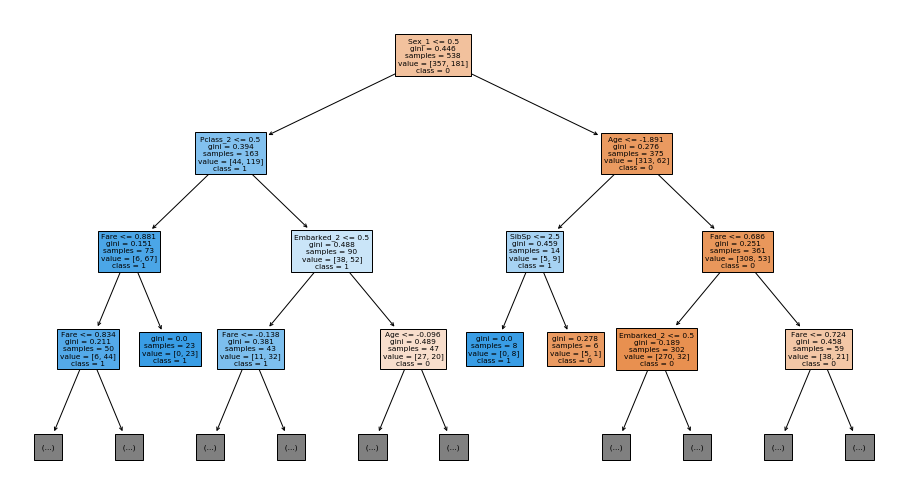

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(tree_best, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=3) 
plt.show()

# 仮説の確認
<p>
    決定木の分類では, 最初に性別から分類を始めている. その次にクラスと年齢で分類をしている.<br>
    最初に立てた仮説の通りの結果となっていることがわかる.<br>
    深さが3のところでは, "SibSp"で生き残ったかどうか, 決まっているところがある.<br>
    "SibSp"は兄弟, 配偶者の数であるため, 多いと助かる確率が減ることも予想がつく.
</p>

# 感想
<p>かかった時間: 6時間くらい</p>

<p>
    あまり, 良い結果にならなかった. もう少し良い結果になるように工夫したかったが, うまくいかなかった.
    Cabinのデータは客室のデータであり, 生存率に影響しそうなため, 利用した方が精度が上がりそうな気がしたが欠損値が多く, どのように処理すれば良いかわからなかったため削除した.
    TicketやNameのデータからも何か特徴量を抽出できれば良かったが, 文字列の処理については知識がないためできなかった.
    また, Grid Searchで設定したパラメータに関しても, 大して知識がないため, ネットにあったパラメータを参考にした.
    その影響のせいか, Grid Searchを行っても, ランダムフォレストとサポートベクトルマシンでは, デフォルトで行った結果と全く同じ結果になってしまった.
    結果として, あまり良い結果とはならなかった.
    まだ, 改善の余地があると思った.
</p>
